In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, mean_absolute_error
from sklearn.tree import plot_tree, DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel

In [111]:
df = pd.read_csv('data/Train.csv')
print('train data shape :', df.shape)
df.head()

train data shape : (23524, 13)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [112]:
# drop columns I don't need for my model
df.drop('year', axis=1, inplace=True)
df.drop('uniqueid', axis=1, inplace=True)
df.head()

,country,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   bank_account            23524 non-null  object
 2   location_type           23524 non-null  object
 3   cellphone_access        23524 non-null  object
 4   household_size          23524 non-null  int64 
 5   age_of_respondent       23524 non-null  int64 
 6   gender_of_respondent    23524 non-null  object
 7   relationship_with_head  23524 non-null  object
 8   marital_status          23524 non-null  object
 9   education_level         23524 non-null  object
 10  job_type                23524 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.0+ MB


convert the category features into integer and type category

In [114]:
df['bank_account'] = df['bank_account'].map({'No': 0, 'Yes': 1})
df['location_type'] = df['location_type'].map({'Rural': 0, 'Urban': 1})
df.columns = df.columns.str.replace('location_type','Urban_location')
df['cellphone_access'] = df['cellphone_access'].map({'No': 0, 'Yes': 1})
df['gender_of_respondent'] = df['gender_of_respondent'].map({'Male': 0, 'Female': 1})

df['country'] =  df['country'].map({'Kenya':0, 'Rwanda':1, 'Tanzania':2, 'Uganda':3})

df['relationship_with_head']=df['relationship_with_head'].map({'Spouse':0,
                                                            'Head of Household':1,
                                                            'Other relative':2,
                                                            'Child':3,
                                                            'Parent':4,
                                                            'Other non-relatives':5})

df['marital_status'] =df['marital_status'].map({'Married/Living together':0,
                                                'Widowed':1,
                                                'Single/Never Married':2,
                                                'Divorced/Seperated':3,
                                                'Dont know':4})


df['education_level'] = df['education_level'].map({'Secondary education':0,
                                                   'No formal education':1,
                                                   'Vocational/Specialised training':2,
                                                   'Primary education':3,
                                                   'Tertiary education':4,
                                                   'Other/Dont know/RTA':5
                                                   }) 
  
df['job_type'] = df['job_type'].map({'Self employed':0,
                                     'Government Dependent':1,
                                     'Formally employed Private':2,
                                     'Informally employed':3,
                                     'Formally employed Government':4,
                                     'Farming and Fishing':5,
                                     'Remittance Dependent':6,
                                     'Other Income':7,
                                     'Dont Know/Refuse to answer':8,
                                     'No Income':9
                                     })

In [115]:
df[['country', 'bank_account', 'Urban_location', 'cellphone_access', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level','job_type']] = df[['country', 
                                                                                        'bank_account', 
                                                                                        'Urban_location', 
                                                                                        'cellphone_access', 
                                                                                        'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level','job_type']].astype('category')

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   country                 23524 non-null  category
 1   bank_account            23524 non-null  category
 2   Urban_location          23524 non-null  category
 3   cellphone_access        23524 non-null  category
 4   household_size          23524 non-null  int64   
 5   age_of_respondent       23524 non-null  int64   
 6   gender_of_respondent    23524 non-null  category
 7   relationship_with_head  23524 non-null  category
 8   marital_status          23524 non-null  category
 9   education_level         23524 non-null  category
 10  job_type                23524 non-null  category
dtypes: category(9), int64(2)
memory usage: 576.1 KB


Random Forest Model function

In [117]:
def my_random_forest_model(X_train, X_test, y_train, y_test, tree_num, depth, leaf, cw0, cw1):

   
    forest_model = RandomForestClassifier(n_estimators=tree_num, 
                                class_weight = {0:cw0, 1:cw1},
                                random_state=123, 
                                max_features = 'sqrt',
                                max_depth = depth, 
                                min_samples_leaf = leaf,
                                n_jobs=-1, verbose = 1)
   
    # Fit on training data
    forest_model.fit(X_train, y_train)
    y_pred = forest_model.predict(X_test)

   
    accuracy_test = (round(accuracy_score(y_test, y_pred),2))
    accuracy_train = (round(accuracy_score(y_train, forest_model.predict(X_train)),2))

    precision_test =  (round(precision_score(y_test, y_pred),2))
    precision_train = (round(precision_score(y_train, forest_model.predict(X_train)),2))

    recall_test =  (round(recall_score(y_test, y_pred),2))
    recall_train = (round(recall_score(y_train, forest_model.predict(X_train)),2))

    metrics_dict={'cw1': cw1, 'cw0': cw0,
                    'tree_num': tree_num,
                    'max_depth':depth,
                    'min_samples_leaf':leaf,
                    'accuracy_test': accuracy_test,
                    'recall_test': recall_test,
                    'precision_test':precision_test,
                    'accuracy_train': accuracy_train,
                    'recall_train': recall_train,
                    'precision_train':precision_train}
    
    return(y_pred, metrics_dict, forest_model)

function for printing the metrics

In [118]:
def print_metrics(metrics_dict):
    print('Metrics Decision Tree Model')
    print('---'*15)
    print('Accuracy - Test:', metrics_dict['accuracy_test' ])
    print('Accuracy - Train:', metrics_dict['accuracy_train' ])
    print('Recall - Test:', metrics_dict['recall_test' ])
    print('Recall - Train:', metrics_dict['recall_train' ])
    print('Precision - Test:', metrics_dict['precision_test' ])
    print('Precision - Train:', metrics_dict['precision_train' ])



function for plotting the True and False predicted values

In [119]:
def plot_metrics(y_pred, y_test, my_Title=''):

    confusion_df = pd.DataFrame([{'class':'0',
                                    'statement': True,
                                    'pred': confusion_matrix(y_test, y_pred)[0][0]},
                                    {'class':'0',
                                    'statement': False,
                                    'pred':confusion_matrix(y_test, y_pred)[0][1] },
                                    {'class':'1',
                                    'statement': True,
                                    'pred':confusion_matrix(y_test, y_pred)[1][1] },
                                    {'class':'1',
                                    'statement': False,
                                    'pred':confusion_matrix(y_test, y_pred)[1][0] }])
    
    sns.set_theme(style='white')
    sns.set_palette(["#8395c1", "#684c6b", "#54927d", "#e2738c"], 2)
    g=sns.catplot(data=confusion_df, x='class',y = 'pred', hue = 'statement', kind='bar').set(xlabel='',
                                                                                            ylabel='Number of predicted Values',
                                                                                            title=my_Title)
    sns.move_legend(g, "upper right", title=None,  bbox_to_anchor=(0.9, 0.9))
    ax = g.facet_axis(0,0)
    g.set_xticklabels(['No Bank Account', 'Bank Account'])
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

   

Basis Model Random Forest

+ Numbers of Trees: 100
+ max depth: 10
+ minimum sample per leaf: 10
+ class weight: 1.0/1.0

In [120]:
selected_features = ['country', 'Urban_location', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type']

X_base = df[selected_features]
y_base = df['bank_account']

# Train-Test-Split
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    stratify=y_base)


print(X_train_base.shape)
print(X_test_base.shape)
print(y_train_base.shape)
print(y_test_base.shape)

(16466, 10)
(7058, 10)
(16466,)
(7058,)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_

Metrics Decision Tree Model
---------------------------------------------
Accuracy - Test: 0.88
Accuracy - Train: 0.89
Recall - Test: 0.27
Recall - Train: 0.28
Precision - Test: 0.75
Precision - Train: 0.81


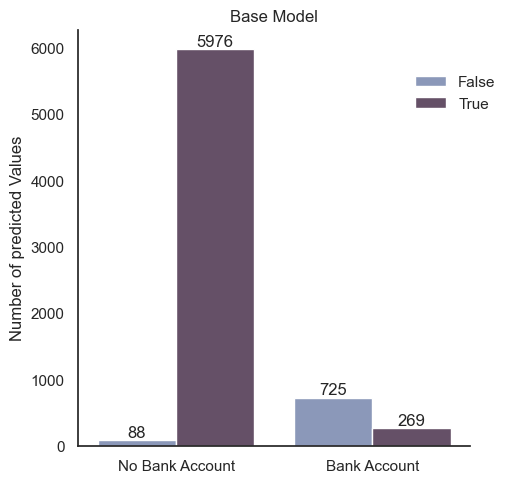

In [121]:
y_pred_base, base_metrics_dict, base_model = my_random_forest_model(X_train_base, X_test_base, y_train_base, y_test_base, 
                                                                               100, 10, 10, 1.0, 1.0)

print_metrics(base_metrics_dict)
plot_metrics(y_pred_base, y_test_base, my_Title='Base Model')

Class Weight Model  

+ class weight to compensate the imbalanced dataset: 0.58 : 3.55 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_

Metrics Decision Tree Model
---------------------------------------------
Accuracy - Test: 0.79
Accuracy - Train: 0.81
Recall - Test: 0.75
Recall - Train: 0.8
Precision - Test: 0.38
Precision - Train: 0.4


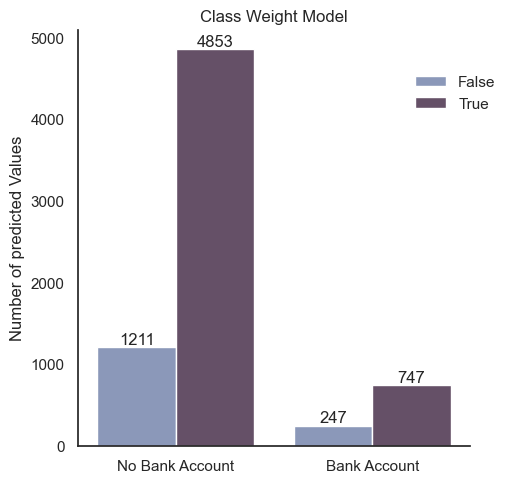

In [122]:
y_pred_class, class_metrics_dict, class_model = my_random_forest_model(X_train_base, X_test_base, y_train_base, y_test_base, 
                                                                               100, 10, 10, 0.58, 3.55)

print_metrics(class_metrics_dict)
plot_metrics(y_pred_class, y_test_base, my_Title='Class Weight Model')

Random Forest with different number of features  
+ which combination is the best?

See Notebook 11_Feature_Importance_Extra_Tree.ipynb for feature importance with Extra Tree Classifier; there are 4 features, who have the most influence.  

testing of feature combination

In [123]:
# feature List with different combination

feature_list = [['age_of_respondent'], #0
                ['household_size'], #1
                ['education_level'], #2
                ['job_type'], #3
                ['age_of_respondent', 'household_size'], #4
                ['age_of_respondent','education_level'], #5
                ['age_of_respondent','job_type'], #6
                ['household_size','education_level'], #7
                ['household_size', 'job_type'], #8
                ['education_level','job_type'], #9
                ['age_of_respondent', 'household_size','education_level'], #10
                ['age_of_respondent', 'household_size','job_type'], #11
                ['household_size','education_level','job_type'], #12
                ['age_of_respondent', 'household_size','education_level','job_type']] #13

In [124]:
feature_difference = []

for item in feature_list:
    X_fea = df[item]
    y_fea = df['bank_account']
    # Train-Test-Split
    X_fea_train, X_fea_test, y_fea_train, y_fea_test = train_test_split(X_fea, y_fea,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    stratify=y_fea)
    y_pred_fea, fea_metrics_dict, loop_model= (my_random_forest_model(X_fea_train, X_fea_test, y_fea_train, y_fea_test, 
                                                                               100, 10, 10, 0.58, 3.55))
    feature_difference.append(fea_metrics_dict)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Par

In [125]:
indexing = np.arange(0,len(feature_difference))
feature_difference_df = pd.DataFrame(feature_difference, index=indexing)
feature_difference_df

,cw1,cw0,tree_num,max_depth,min_samples_leaf,accuracy_test,recall_test,precision_test,accuracy_train,recall_train,precision_train
0,3.55,0.58,100,10,10,0.40,0.78,0.16,0.41,0.82,0.17
1,3.55,0.58,100,10,10,0.59,0.44,0.16,0.59,0.46,0.16
2,3.55,0.58,100,10,10,0.77,0.64,0.33,0.77,0.61,0.33
3,3.55,0.58,100,10,10,0.84,0.34,0.40,0.84,0.34,0.40
4,3.55,0.58,100,10,10,0.51,0.66,0.17,0.54,0.75,0.20
5,3.55,0.58,100,10,10,0.81,0.60,0.39,0.81,0.60,0.40
6,3.55,0.58,100,10,10,0.69,0.55,0.24,0.71,0.60,0.27
7,3.55,0.58,100,10,10,0.77,0.63,0.34,0.77,0.61,0.33
8,3.55,0.58,100,10,10,0.76,0.45,0.28,0.77,0.48,0.30
9,3.55,0.58,100,10,10,0.80,0.65,0.37,0.79,0.63,0.36


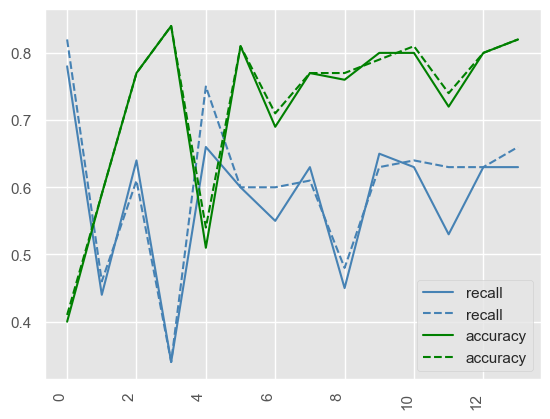

In [126]:
# Plotting 
plt.style.use('ggplot') 

plt.plot(feature_difference_df.index, feature_difference_df.recall_test,'-', c="steelblue", label="recall")
plt.plot(feature_difference_df.index, feature_difference_df.recall_train,'--', c="steelblue", label="recall")
plt.plot(feature_difference_df.index, feature_difference_df.accuracy_test,'-', c="green", label="accuracy")
plt.plot(feature_difference_df.index, feature_difference_df.accuracy_train,'--', c="green", label="accuracy")
#plt.plot(feature_difference_df.index, feature_difference_df.precision_test,c="black", label="precision")
plt.xticks(rotation=90, ha="right")
plt.legend()


plt.show();

Best combination, where Both, Accuracy and Recall are on hight level, test and train data very similar:   
  
Winner:    
#9 ['education_level','job_type']  
  
Alternative:  
#7 ['household_size','education_level']  
#10 ['age_of_respondent', 'household_size','education_level']  
#12 ['household_size','education_level','job_type']  

Train/Test Data with just 2-3 features

In [127]:
#selected_features = ['education_level','job_type']
#selected_features = ['household_size','education_level']
#selected_features = ['age_of_respondent', 'household_size','education_level']
#selected_features = ['household_size','education_level','job_type']
selected_features = ['country', 'household_size', 'age_of_respondent', 'education_level', 'job_type']
       
      

X = df[selected_features]
y = df['bank_account']

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=123,
                                                    stratify=y)


print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16466, 5)
(7058, 5)
(16466,)
(7058,)


Model with feature selection

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_

Metrics Decision Tree Model
---------------------------------------------
Accuracy - Test: 0.81
Accuracy - Train: 0.82
Recall - Test: 0.69
Recall - Train: 0.74
Precision - Test: 0.39
Precision - Train: 0.42


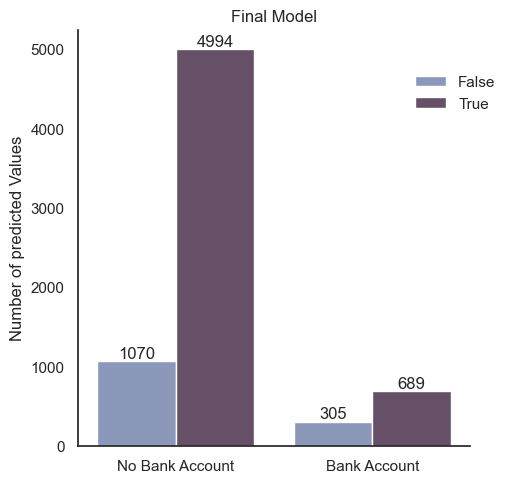

In [128]:
y_pred_fopt, fopt_metrics_dict, fopt_model = my_random_forest_model(X_train, X_test, y_train, y_test, 
                                                                               100, 10, 10, 0.58, 3.55)

print_metrics(fopt_metrics_dict)
plot_metrics(y_pred_fopt, y_test, my_Title='Final Model')

Model with feature selection is NOT better than without feature selection

Model optimizion with Grid Search

In [129]:
fopt_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 0.58, 1: 3.55},
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 1,
 'warm_start': False}

In [130]:
# from sklearn.model_selection import RandomizedSearchCV

# # Hyperparameter grid
# param_grid = {
#     'n_estimators':  np.linspace(10, 100, num = 10).astype(int),
#     'criterion': ['log_loss', 'gini', 'entropy'],
#     'max_depth': np.linspace(2, 40, num = 20).astype(int),
#     'max_features': ['auto', 'sqrt', None],
#     'min_samples_leaf': (np.linspace(2, 20, 10)).astype(int),
#     'min_samples_split': [2, 5, 10],
#     'bootstrap': [True, False]

# }

# # Estimator for use in random search
# estimator = RandomForestClassifier(random_state = 123)

# # Create the random search model
# randsearch = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
#                         scoring = 'roc_auc', cv = 3, 
#                         n_iter = 25, verbose = 5, random_state=123)

# # Fit 
# randsearch.fit(X_train, y_train)

In [131]:
randsearch.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': None,
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': True}

In [132]:
def opt_random_forest_model(X_train, X_test, y_train, y_test):

   
    forest_model = RandomForestClassifier(n_estimators=40, 
                                class_weight = 'balanced',
                                random_state=123, 
                                max_features = 'sqrt',
                                max_depth = 24, 
                                min_samples_split = 2,
                                min_samples_leaf = 2,
                                bootstrap = True,
                                n_jobs=-1, verbose = 1)
   
    # Fit on training data
    forest_model.fit(X_train, y_train)
    y_pred = forest_model.predict(X_test)

   
    accuracy_test = (round(accuracy_score(y_test, y_pred),2))
    accuracy_train = (round(accuracy_score(y_train, forest_model.predict(X_train)),2))

    precision_test =  (round(precision_score(y_test, y_pred),2))
    precision_train = (round(precision_score(y_train, forest_model.predict(X_train)),2))

    recall_test =  (round(recall_score(y_test, y_pred),2))
    recall_train = (round(recall_score(y_train, forest_model.predict(X_train)),2))

    metrics_dict={'accuracy_test': accuracy_test,
                    'recall_test': recall_test,
                    'precision_test':precision_test,
                    'accuracy_train': accuracy_train,
                    'recall_train': recall_train,
                    'precision_train':precision_train}
    
    return(y_pred, metrics_dict, forest_model)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  40 out of  40 | elapsed:    0.0s finished


Metrics Decision Tree Model
---------------------------------------------
Accuracy - Test: 0.84
Accuracy - Train: 0.91
Recall - Test: 0.55
Recall - Train: 0.84
Precision - Test: 0.43
Precision - Train: 0.63


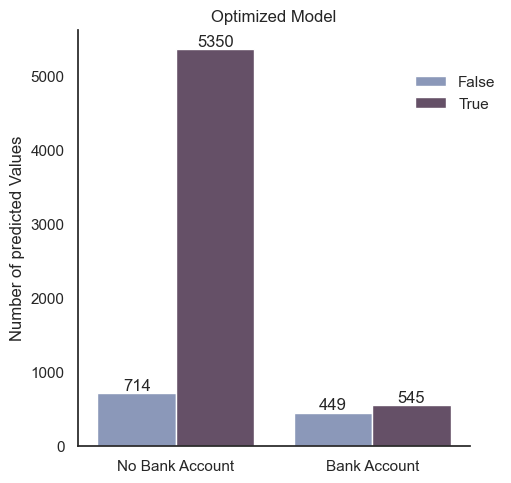

In [133]:
y_pred_opt, opt_metrics_dict, opt_forest_model = opt_random_forest_model(X_train, X_test, y_train, y_test)

print_metrics(opt_metrics_dict)
plot_metrics(y_pred_opt, y_test, my_Title='Optimized Model')